<a href="https://colab.research.google.com/github/Alilson2/Projeto_IA/blob/main/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr # Ler arquivos netcdf
from google.colab import drive
import seaborn as sns


In [55]:
import os
import xarray as xr

# --- 1️⃣ Clonar o repositório se ainda não existir ---
if not os.path.exists("Projeto_IA"):
    !git clone https://github.com/Alilson2/Projeto_IA.git
else:
    print("📁 Repositório 'Projeto_IA' já existe — pulando o clone.")


# --- 2️⃣ Conferir se a pasta foi realmente criada ---
if not os.path.exists("Projeto_IA"):
    raise FileNotFoundError("❌ A pasta 'Projeto_IA' não foi encontrada. O clone pode ter falhado.")
else:
    print("\n✅ Repositório clonado com sucesso!")
    print("\nArquivos dentro da pasta Projeto_IA:\n")
    print(os.listdir("Projeto_IA"))


# --- 3️⃣ Localizar o arquivo .nc automaticamente ---
arquivos_nc = [f for f in os.listdir("Projeto_IA") if f.endswith(".nc")]

if not arquivos_nc:
    raise FileNotFoundError("❌ Nenhum arquivo .nc encontrado na pasta Projeto_IA!")
else:
    print("\n📦 Arquivo(s) NetCDF encontrado(s):")
    for f in arquivos_nc:
        print(" -", f)

    # Pega o primeiro arquivo .nc encontrado
    arquivo = os.path.join("Projeto_IA", arquivos_nc[0])
    print(f"\nUsando o arquivo: {arquivo}")


# --- 4️⃣ Abrir o arquivo com xarray ---
dados = xr.open_dataset(arquivo)

print("\n✅ Dataset carregado com sucesso!\n")
print(dados)



Cloning into 'Projeto_IA'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 8.91 MiB | 20.22 MiB/s, done.
Resolving deltas: 100% (6/6), done.

✅ Repositório clonado com sucesso!

Arquivos dentro da pasta Projeto_IA:

['(ABRIL 2024 - 1a15) cbec3732f428a3c38f998555ad01121d.nc', '(ABRIL 2024 - 16a30) cf0673d7bed1678eb7801afb06bf2c0f.nc', '(MARÇO 2024 - 1a15) 27b35cf2be7d06ee99adbf9b6c8a7e3d.nc', '(FEV 2024 - 1a15) abb5271a8b7c45bb0875d41fec36c189.nc', '.git', '(MARÇO 2024 - 16a31) 6c099d8aa5c5a42c3965166ce59af1b2.nc', '(JAN 2024 - 16a31) ea884d573d8753c6f2976f9e4b642c11.nc', '(JAN 2024 - 1a15) 1ef5ab89e05ec50451a473eaac0197a5.nc', 'README.md', '(MAIO 2024 - 1a15) 43295239c76e33d0ac9a1fdb69ad8f44.nc', 'Projeto_IA.ipynb', '(FEV 2024 - 16a29) 3c44a136f94118edef61d5f38d0d27cd.nc']

📦 Arquivo(s) NetCDF enc

In [56]:
dados.info()

xarray.Dataset {
dimensions:
	valid_time = 360 ;
	latitude = 11 ;
	longitude = 11 ;

variables:
	float32 d2m(valid_time, latitude, longitude) ;
		d2m:GRIB_paramId = 168 ;
		d2m:GRIB_dataType = fc ;
		d2m:GRIB_numberOfPoints = 121 ;
		d2m:GRIB_typeOfLevel = surface ;
		d2m:GRIB_stepUnits = 1 ;
		d2m:GRIB_stepType = instant ;
		d2m:GRIB_gridType = regular_ll ;
		d2m:GRIB_uvRelativeToGrid = 0 ;
		d2m:GRIB_NV = 0 ;
		d2m:GRIB_Nx = 11 ;
		d2m:GRIB_Ny = 11 ;
		d2m:GRIB_cfName = unknown ;
		d2m:GRIB_cfVarName = d2m ;
		d2m:GRIB_gridDefinitionDescription = Latitude/Longitude Grid ;
		d2m:GRIB_iDirectionIncrementInDegrees = 0.1 ;
		d2m:GRIB_iScansNegatively = 0 ;
		d2m:GRIB_jDirectionIncrementInDegrees = 0.1 ;
		d2m:GRIB_jPointsAreConsecutive = 0 ;
		d2m:GRIB_jScansPositively = 0 ;
		d2m:GRIB_latitudeOfFirstGridPointInDegrees = -23.2 ;
		d2m:GRIB_latitudeOfLastGridPointInDegrees = -24.201 ;
		d2m:GRIB_longitudeOfFirstGridPointInDegrees = -47.197 ;
		d2m:GRIB_longitudeOfLastGridPointInDegrees = 

In [59]:
# --- 2. Verificar se há a coordenada temporal ---
if "valid_time" not in dados.coords:
    raise ValueError("O dataset não contém uma coordenada temporal chamada 'time'.")

# --- 3. Converter o eixo temporal para pandas.DatetimeIndex ---
tempo = pd.to_datetime(dados["valid_time"].values)

# --- 4. Criar DataFrame com componentes temporais ---
df_tempo = pd.DataFrame({
    "timestamp": tempo,
    "timestamp_segundos": tempo.view("int64") / 1e9,   # converte para segundos desde 1970
    "ano": tempo.year,
    "mes": tempo.month,
    "dia": tempo.day,
    "hora": tempo.hour,
    "minuto": tempo.minute,
    "segundo": tempo.second,
    "dia_semana": tempo.dayofweek,
    "dia_do_ano": tempo.dayofyear
})

print(df_tempo)

              timestamp  timestamp_segundos   ano  mes  dia  hora  minuto  \
0   2024-04-01 00:00:00        1.711930e+09  2024    4    1     0       0   
1   2024-04-01 01:00:00        1.711933e+09  2024    4    1     1       0   
2   2024-04-01 02:00:00        1.711937e+09  2024    4    1     2       0   
3   2024-04-01 03:00:00        1.711940e+09  2024    4    1     3       0   
4   2024-04-01 04:00:00        1.711944e+09  2024    4    1     4       0   
..                  ...                 ...   ...  ...  ...   ...     ...   
355 2024-04-15 19:00:00        1.713208e+09  2024    4   15    19       0   
356 2024-04-15 20:00:00        1.713211e+09  2024    4   15    20       0   
357 2024-04-15 21:00:00        1.713215e+09  2024    4   15    21       0   
358 2024-04-15 22:00:00        1.713218e+09  2024    4   15    22       0   
359 2024-04-15 23:00:00        1.713222e+09  2024    4   15    23       0   

     segundo  dia_semana  dia_do_ano  
0          0           0          92

In [60]:
# Converte o dataset xarray em um DataFrame do pandas
df_panda = dados.to_dataframe()

# Concatena com outro DataFrame (df_tempo)
# Se você quer adicionar colunas:
df = pd.concat([df_panda, df_tempo])
drop.timestamp

# Se você quer empilhar linhas (um abaixo do outro):
# df_panda = pd.concat([df_panda, df_tempo], axis=0)
# Exibe o resultado final
df


NameError: name 'drop' is not defined

KeyboardInterrupt: 

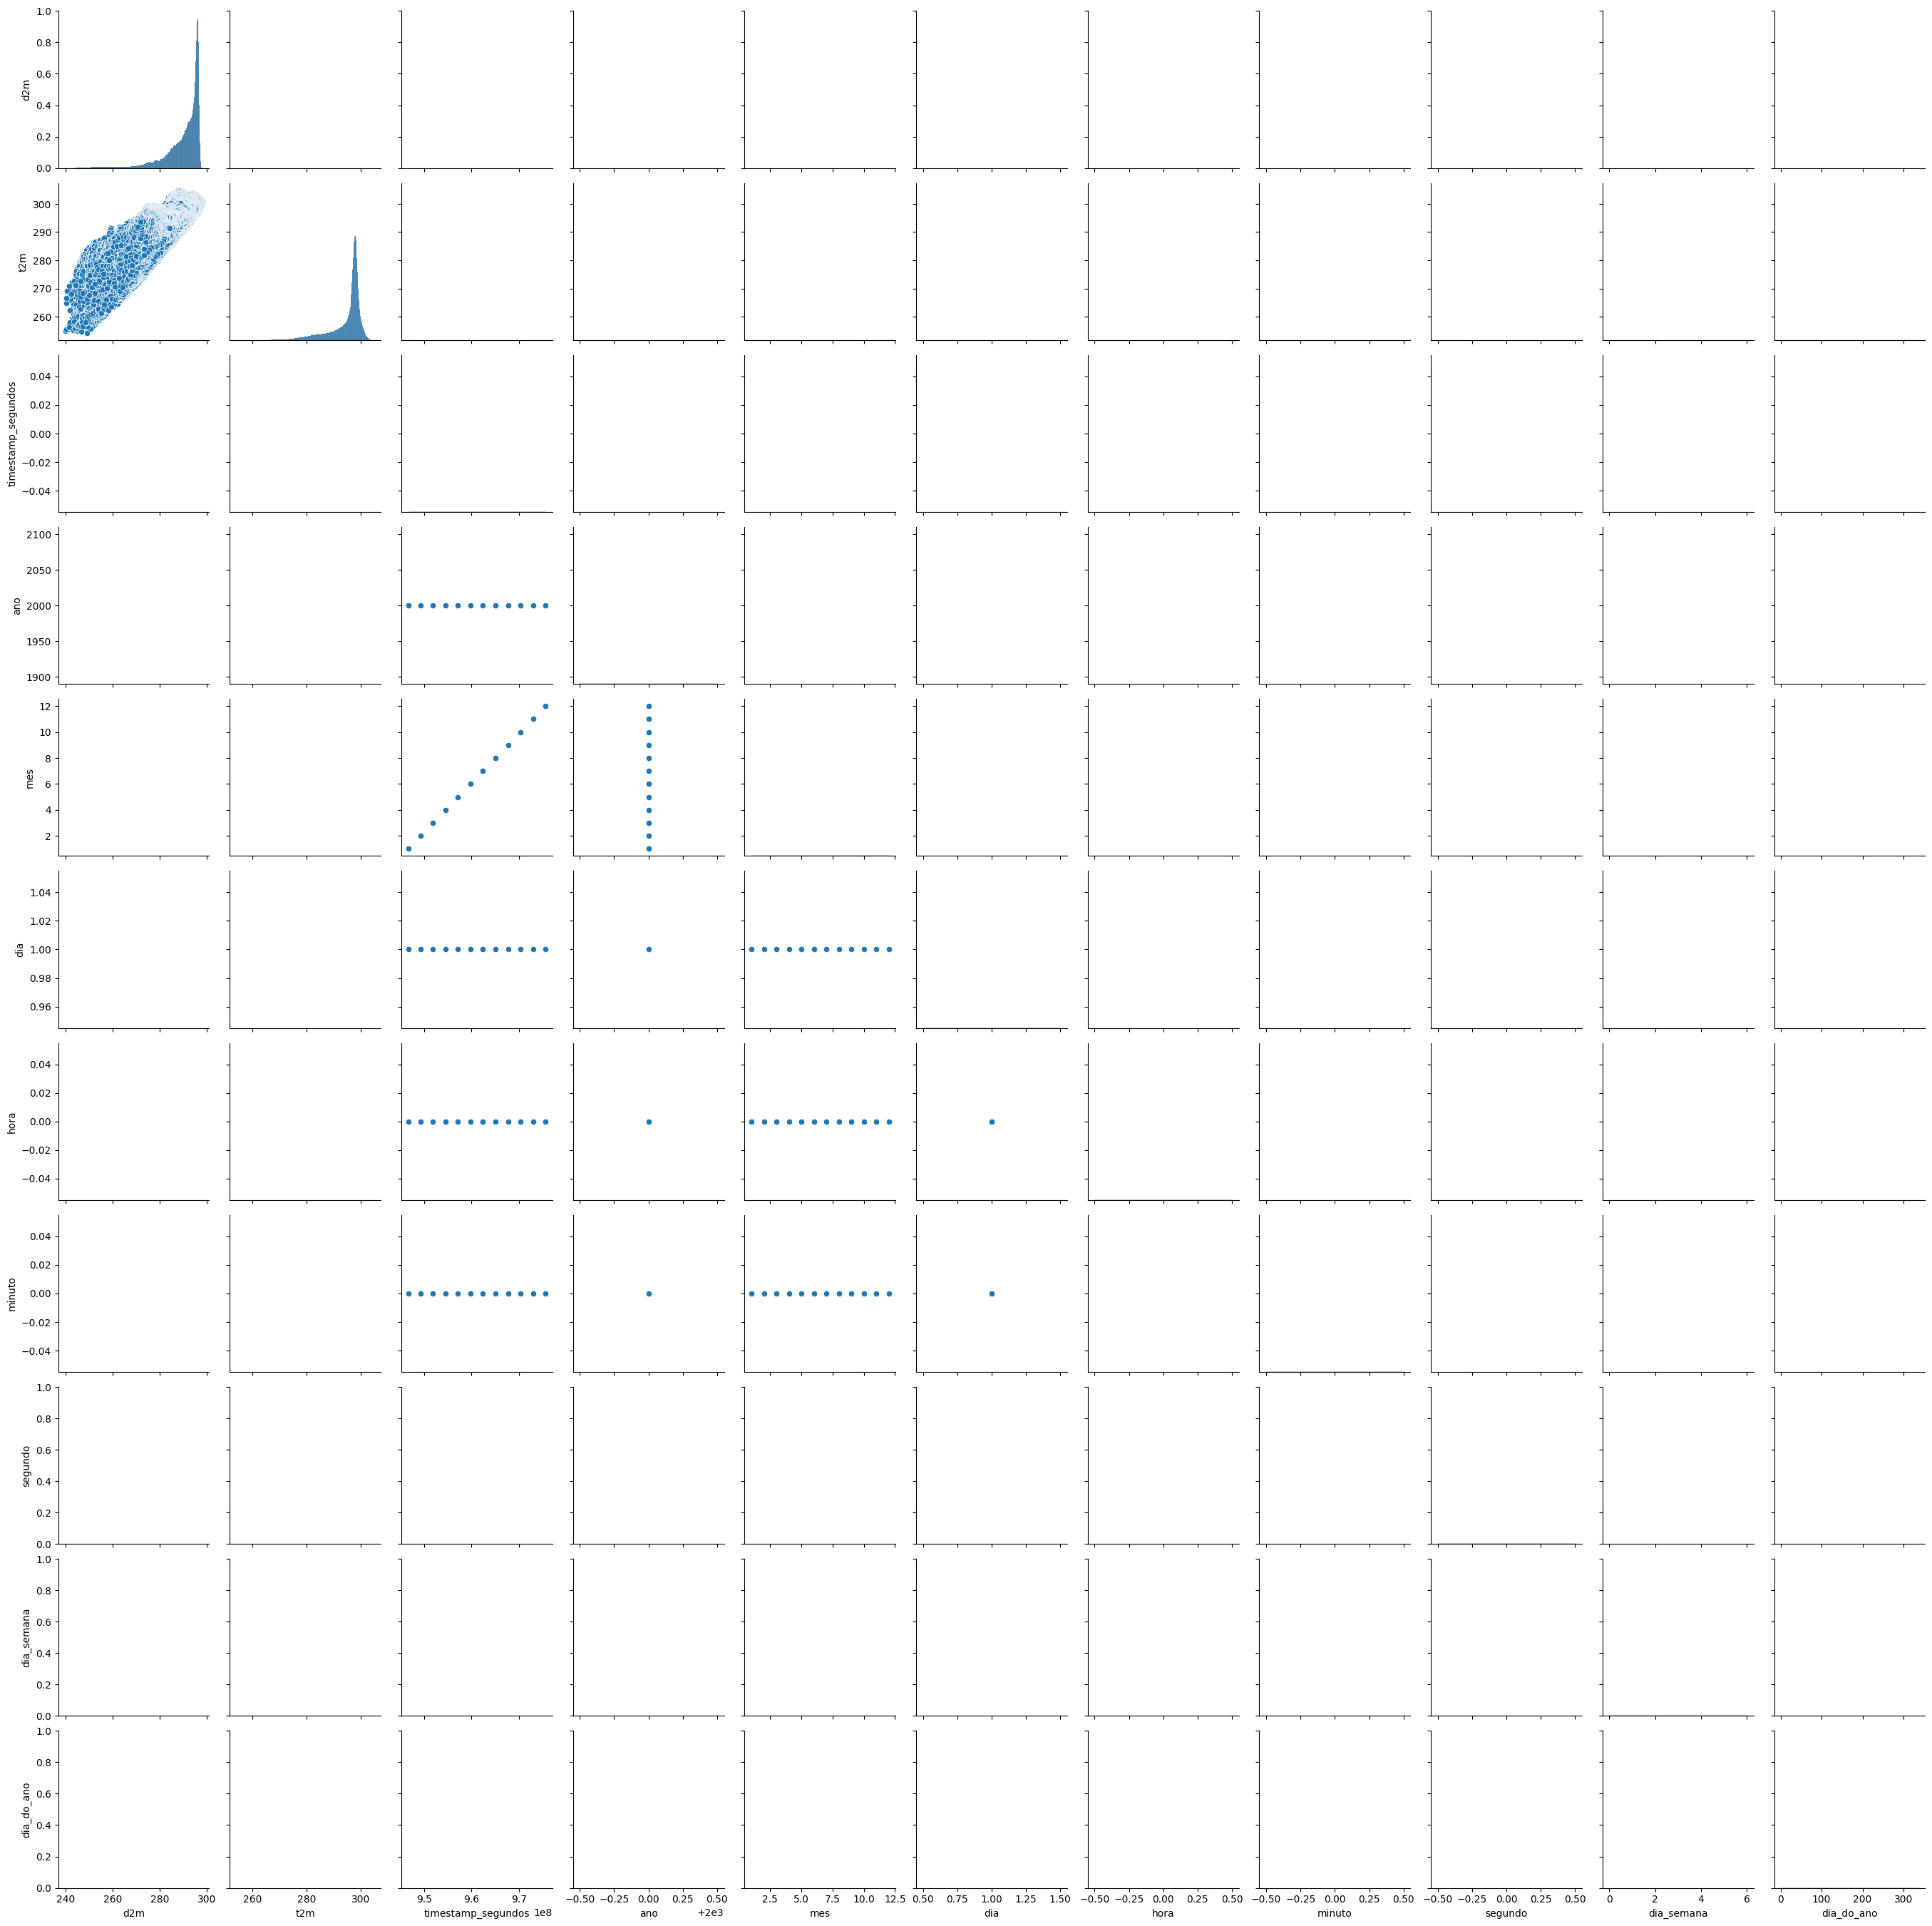

In [ ]:
sns.pairplot(df)
plt.show()

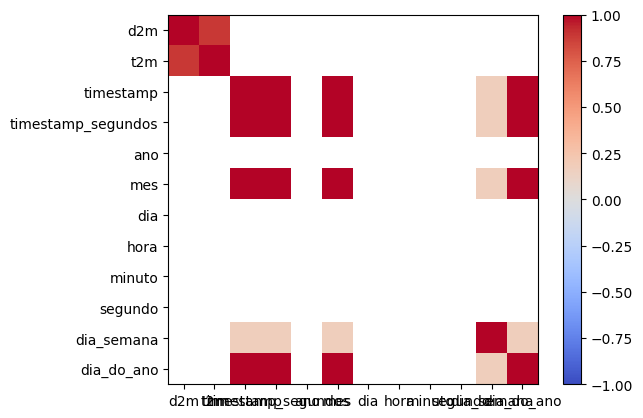

In [ ]:
matrix = df.corr(method='pearson')
plt.imshow(matrix, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(matrix.columns)), matrix.columns)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

# Separa features e alvo
if 'critical_temp' in dados.variables:
    X = dados.drop('critical_temp') #Tirar o prediletor
    y = dados['critical_temp']              #O preditor, separado
else:
    print("Variável 'critical_temp' não encontrada no dataset.")
    # Handle the case where 'critical_temp' is not in the dataset,
    # perhaps by choosing a different target variable or exiting
    # For now, I'll assume you'll need to adjust the code based on your data
    X = dados # Keep all variables as features for now
    y = None # No target variable defined


if y is not None:
    kf = KFold(n_splits=3, random_state=42, shuffle=True)

    # Listas para armazenar os folds (para uso em outras partes)
    X_train_folds, X_test_folds = [], []
    y_train_folds, y_test_folds = [], []

    fold = 1
    for train_index, test_index in kf.split(X):
        print(f"\n=== Fold {fold} ===")

        # Divisão treino/teste
        # Need to convert xarray DataArray to pandas DataFrame for iloc
        X_train = X.isel(valid_time=train_index).to_dataframe()
        X_test = X.isel(valid_time=test_index).to_dataframe()
        y_train = y.isel(valid_time=train_index).to_dataframe()
        y_test = y.isel(valid_time=test_index).to_dataframe()

        print(f"Shape X_train: {X_train.shape}, X_test: {X_test.shape}")

        # Escalonamento e armazena conjuntos
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)

        X_train_folds.append(X_train_s)
        X_test_folds.append(X_test_s)
        y_train_folds.append(y_train)
        y_test_folds.append(y_test)

        fold += 1
else:
    print("Não foi possível prosseguir com a divisão em folds sem uma variável alvo.")

ValueError: the first argument to .drop must be a dictionary

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Listas para armazenar métricas
r2_train_list, r2_test_list = [], []
mse_train_list, mse_test_list = [], []
mae_train_list, mae_test_list = [], []

for i in range(len(X_train_folds)):
    fold = i + 1
    print(f"\n===== Fold {fold} =====")

    # Modelode regressão linear
    a = 0.5
    ridgeReg = Ridge(alpha=a)
    ridgeReg.fit(X_train_folds[i], np.ravel(y_train_folds[i]))  # garante y 1D

    # Predições
    y_pred_train = regr.predict(X_train_folds[i])
    y_pred_test  = regr.predict(X_test_folds[i])

    # Métricas
    r2_train = r2_score(y_train_folds[i], y_pred_train)
    r2_test  = r2_score(y_test_folds[i], y_pred_test)
    mse_train = mean_squared_error(y_train_folds[i], y_pred_train)
    mse_test  = mean_squared_error(y_test_folds[i], y_pred_test)
    mae_train = mean_absolute_error(y_train_folds[i], y_pred_train)
    mae_test  = mean_absolute_error(y_test_folds[i], y_pred_test)

    print(f"[Fold {fold}] R² Treino: {r2_train:.4f} | R² Teste: {r2_test:.4f}")
    print(f"[Fold {fold}] MSE Treino: {mse_train:.4f} | MSE Teste: {mse_test:.4f}")
    print(f"[Fold {fold}] MAE Treino: {mae_train:.4f} | MAE Teste: {mae_test:.4f}")

    # Salva o resultado das métricas
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)

NameError: name 'X_train_folds' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Definação das features
features_to_plot = (80, 64)  # Exemplo: primeiras duas features
feature_names_to_plot = [X.columns[features_to_plot[0]], X.columns[features_to_plot[1]]]

# Loop de treino e avaliação por folds
rf_models = []

for i in range(len(X_train_folds)):
    print(f"\n===== Fold {i+1} =====")

    # Treina RandomForestRegressor
    clf = RandomForestRegressor(random_state=42)
    clf.fit(X_train_folds[i], np.ravel(y_train_folds[i]))  # garante y 1D

    # Armazena modelo
    rf_models.append(clf)

    # Avaliação do modelo
    r2_train = clf.score(X_train_folds[i], y_train_folds[i])
    r2_test = clf.score(X_test_folds[i], y_test_folds[i])
    print(f"[Fold {i+1}] R² Treino: {r2_train:.4f} | R² Teste: {r2_test:.4f}")

    # Ranking de importância das features
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns  # nomes das features

    print(f"\n📊 Ranking de importância das features - Fold {i+1}:\n")
    for rank, idx in enumerate(indices, start=1):
        print(f"{rank:2d}. {feature_names[idx]:<25} — {importances[idx]:.4f}")

    # Gráfico de importância das features
    plt.figure(figsize=(12, 6))
    plt.title(f"Importância das Features - Fold {i+1}")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha="right")
    plt.ylabel("Importância relativa")
    plt.tight_layout()
    plt.show()